In [30]:
import numpy as np
import matplotlib.pyplot as pp

In [31]:
def myfunc(x,y):
    return (x**2 + y**2 + 1.5*x*y)

<a list of 9 text.Text objects>

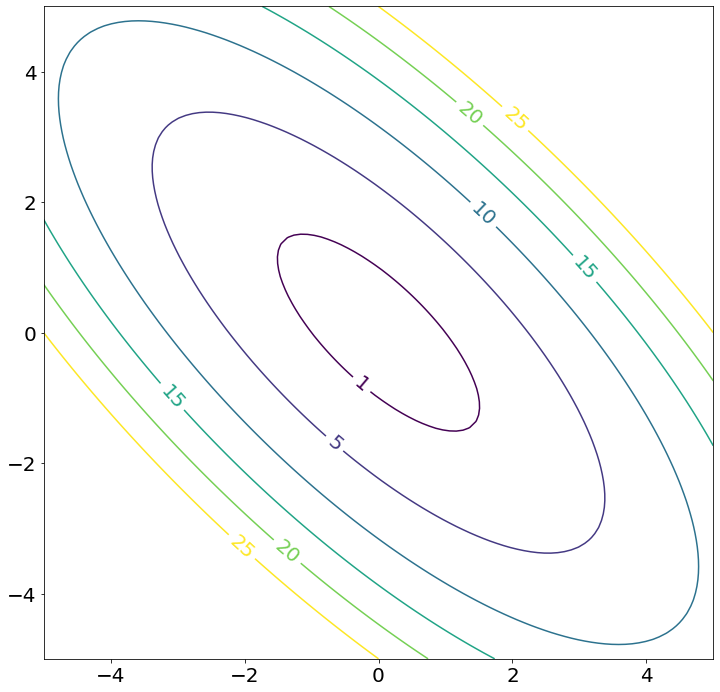

In [32]:
x,y = np.meshgrid(np.linspace(-5,5,100), np.linspace(-5,5,100))
pp.figure(figsize=(12,12))
c = pp.contour(x,y,myfunc(x,y),[1,5,10,15,20,25])
pp.xticks(fontsize=20)
pp.yticks(fontsize=20)
pp.clabel(c, fontsize=20)

In [60]:
n = 1000000
xchain = np.zeros(n)
ychain = np.zeros(n)
oldz = myfunc(0,0)
for i in range(1,n):
    newx = xchain[i-1] + np.random.normal()
    newy = ychain[i-1] + np.random.normal()
    newz = myfunc(newx,newy)
    if (newz > oldz):
        if (np.random.rand() > np.exp(-0.5*(newz-oldz))):
            #reject
            xchain[i] = xchain[i-1]
            ychain[i] = ychain[i-1]
        else:
            #accept
            xchain[i] = newx
            ychain[i] = newy
            oldz = newz
    else:
        #accept
        xchain[i] = newx
        ychain[i] = newy
        oldz = newz        

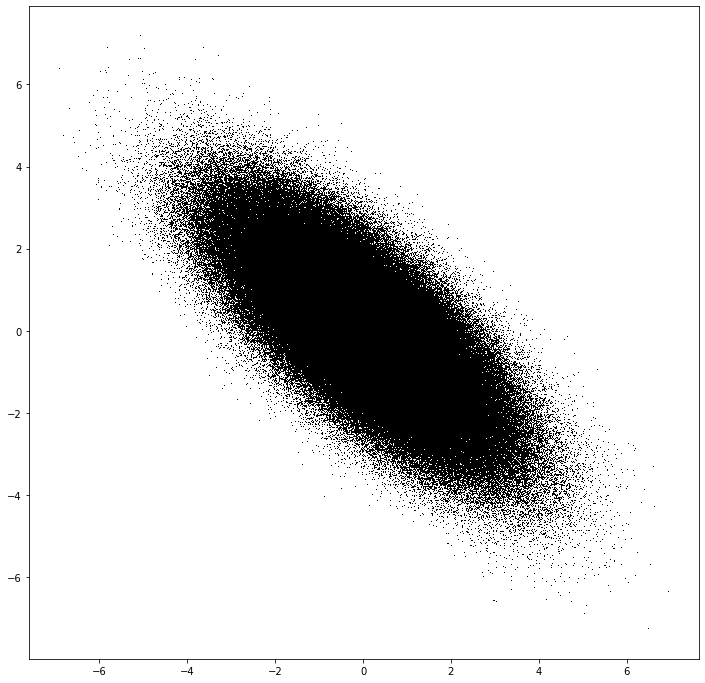

In [62]:
pp.figure(figsize=(12,12))
pp.plot(xchain, ychain, 'k,')

In [63]:
np.mean(xchain), np.std(xchain)

(0.0006344358543601916, 1.5118133113346544)

In [64]:
np.mean(ychain), np.std(ychain)

(0.0013032740783671158, 1.5144674978103627)

In [65]:
np.corrcoef(xchain, ychain)

array([[ 1.        , -0.75175539],
       [-0.75175539,  1.        ]])

(array([1.60000e+01, 4.90000e+01, 9.30000e+01, 2.48000e+02, 7.33000e+02,
        1.93900e+03, 4.27200e+03, 9.31200e+03, 1.72700e+04, 3.00920e+04,
        4.80710e+04, 6.99040e+04, 9.15950e+04, 1.11327e+05, 1.20773e+05,
        1.19725e+05, 1.08595e+05, 8.93080e+04, 6.76880e+04, 4.65610e+04,
        2.92540e+04, 1.71880e+04, 8.68100e+03, 4.25000e+03, 1.85600e+03,
        7.91000e+02, 2.85000e+02, 9.00000e+01, 2.40000e+01, 1.00000e+01]),
 array([-6.91182303, -6.44990912, -5.9879952 , -5.52608129, -5.06416737,
        -4.60225346, -4.14033954, -3.67842563, -3.21651172, -2.7545978 ,
        -2.29268389, -1.83076997, -1.36885606, -0.90694214, -0.44502823,
         0.01688569,  0.4787996 ,  0.94071352,  1.40262743,  1.86454134,
         2.32645526,  2.78836917,  3.25028309,  3.712197  ,  4.17411092,
         4.63602483,  5.09793875,  5.55985266,  6.02176658,  6.48368049,
         6.94559441]),
 <BarContainer object of 30 artists>)

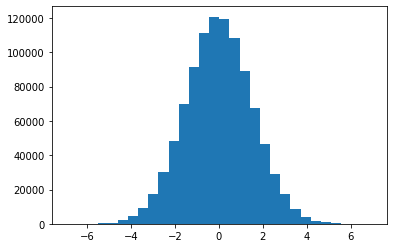

In [66]:
pp.hist(xchain, bins=30)

(array([8.00000e+00, 1.60000e+01, 5.50000e+01, 1.72000e+02, 5.62000e+02,
        1.33400e+03, 3.25100e+03, 7.10300e+03, 1.42420e+04, 2.64410e+04,
        4.37060e+04, 6.56730e+04, 9.01570e+04, 1.10734e+05, 1.23549e+05,
        1.25253e+05, 1.14401e+05, 9.52920e+04, 7.09640e+04, 4.81750e+04,
        2.92270e+04, 1.60940e+04, 7.94900e+03, 3.53400e+03, 1.38000e+03,
        4.88000e+02, 1.47000e+02, 5.10000e+01, 2.90000e+01, 1.30000e+01]),
 array([-7.26226925, -6.7810309 , -6.29979255, -5.8185542 , -5.33731584,
        -4.85607749, -4.37483914, -3.89360079, -3.41236244, -2.93112409,
        -2.44988574, -1.96864739, -1.48740904, -1.00617069, -0.52493234,
        -0.04369399,  0.43754437,  0.91878272,  1.40002107,  1.88125942,
         2.36249777,  2.84373612,  3.32497447,  3.80621282,  4.28745117,
         4.76868952,  5.24992787,  5.73116623,  6.21240458,  6.69364293,
         7.17488128]),
 <BarContainer object of 30 artists>)

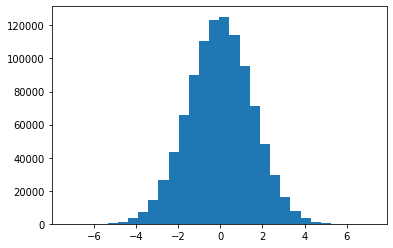

In [67]:
pp.hist(ychain, bins=30)

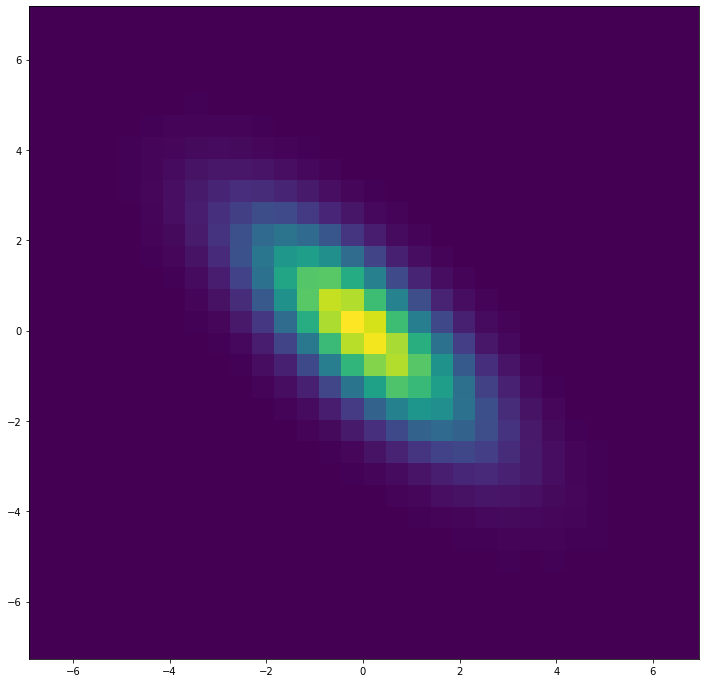

In [68]:
pp.figure(figsize=(12,12))
(z, xe, ye, _) = pp.hist2d(xchain,ychain, bins=30)

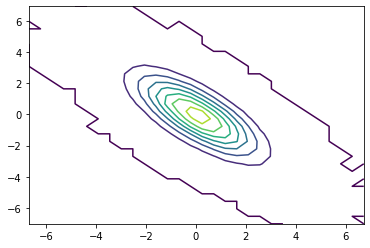

In [69]:
x,y = np.meshgrid(0.5*(xe[1:]+xe[:-1]),0.5*(ye[1:]+ye[:-1]))
c = pp.contour(x,y,z)